# Import Libraries

In [1]:
import yt
import unyt

import caesar
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

import os

# Load snapshots with yt and halo/galaxy information with caesar

In [2]:
snap_info = {
    ## Manhattan Suite L0 - Halo 0 ##
    # '067':{
    #     'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_067.hdf5',
    #     'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_067.hdf5',
    #     'halo_id':0,
    # },
    # '079':{
    #     'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_079.hdf5',
    #     'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_079.hdf5',
    #     'halo_id':0,
    # },
    '091':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_091.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_091.hdf5',
        'halo_id':0,
    },
    '104':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_104.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_104.hdf5',
        'halo_id':0,
    },
    '119':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_119.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_119.hdf5',
        'halo_id':0,
    },
    '136':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_136.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_136.hdf5',
        'halo_id':0,
    },
    '154':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_154.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_154.hdf5',
        'halo_id':0,
    },
    '176':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_176.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_176.hdf5',
        'halo_id':0,
    },
    '201':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_201.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_201.hdf5',
        'halo_id':0,
    },
    '233':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_233.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_233.hdf5',
        'halo_id':0,
    },
    '252':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_252.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_252.hdf5',
        'halo_id':0,
    },
    '272':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5',
        'caesar_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_272.hdf5',
        'halo_id':0,
    },
}

In [3]:
for key, items in snap_info.items():
    snap = yt.load(items['snap_file'])
    obj = caesar.load(items['caesar_file'])

    items['snap'] = snap
    items['obj'] = obj

yt : [INFO     ] 2026-01-13 22:15:16,651 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2026-01-13 22:15:16,664 Calculating time from 9.101e-02 to be 1.500e+16 seconds
yt : [INFO     ] 2026-01-13 22:15:16,666 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2026-01-13 22:15:16,765 Parameters: current_time              = 1.5003494870510782e+16 s
yt : [INFO     ] 2026-01-13 22:15:16,766 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2026-01-13 22:15:16,766 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2026-01-13 22:15:16,767 Parameters: domain_right_edge         = [1000000. 1000000. 1000000.]
yt : [INFO     ] 2026-01-13 22:15:16,767 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2026-01-13 22:15:16,768 Parameters: current_redshift          = 9.987960549024685
yt : [INFO     ] 2026-01-13 22:15:16,768 Parameters: omega_lambda              = 0.692
yt : [INFO     ] 2026-01-13 22:15:16,769

In [4]:
nrows, ncols = 2, 5

## Snapshot properties

In [5]:
for key, items in snap_info.items():
    snap = items['snap']

    age = snap.current_time.in_units('Gyr')
    z = snap.current_redshift
    data = snap.all_data()

    items['snap_props'] = {
        'age':age,
        'z':z,
        'data':data,
    }

yt : [INFO     ] 2026-01-13 22:15:20,386 Allocating for 8.387e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 4213.86it/s]
yt : [INFO     ] 2026-01-13 22:15:26,460 Allocating for 8.387e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 3900.87it/s]
yt : [INFO     ] 2026-01-13 22:15:28,232 Allocating for 8.387e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 3618.65it/s]
yt : [INFO     ] 2026-01-13 22:15:29,713 Allocating for 8.387e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 3553.03it/s]
yt : [INFO     ] 2026-01-13 22:15:31,174 Allocating for 8.386e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 3397.06it/s]
yt : [INFO     ] 2026-01-13 22:15:32,652 Allocating for 8.386e+07 particles
Loading particle index: 100%|██████████| 125/125 [00:00<00:00, 3882.12it/s]
yt : [INFO     ] 2026-01-13 22:15:34,628 Allocating for 8.386e+07 particles
Loading part

In [6]:
for key, items in snap_info.items():
    snap = items['snap']

    h = snap.hubble_constant
    H = h * snap.arr(100, 'km/s/Mpc')  # Convert little-h to H0
    Omega_M = snap.omega_matter
    rho_crit = snap.critical_density

    items['snap_props']['h'] = h
    items['snap_props']['H'] = H
    items['snap_props']['Omega_M'] = Omega_M
    items['snap_props']['rho_crit'] = rho_crit

In [7]:
snap_info['272']['snap'].derived_field_list

[('PartType0', 'AGS-Softening'),
 ('PartType0', 'AccKey'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'

## Get target halo properties

In [8]:
mu = 0.59

for key, items in snap_info.items():
    snap_props = items['snap_props']
    obj = items['obj']
    
    halo = obj.halos[items['halo_id']]
    minpotpos = halo.minpotpos
    m200c = halo.virial_quantities['m200c']
    r200c = halo.virial_quantities['r200c']

    ## Halo virial temperature from van de Voor et al (2011)
    Tvir_vandevoort2011 = (((unyt.G**2 * snap_props['H']**2 * snap_props['Omega_M'] * 18 * np.pi**2)/54)**(1./3.) * (mu * unyt.mh / unyt.kb) * (m200c**(2./3.)) * (1 + snap_props['z'])).in_units('K')

    ## Halo virial temperature from Dave+2019
    Tvir_dave2019 = unyt.unyt_quantity(9.52e7, 'K') * (m200c/unyt.unyt_quantity(1e15, 'Msun'))**(1./3.)

    ## Get halo ICM/hot gas/super-virial mass, as well as other masses of gas phases?
    

    items['halo_props'] = {
        'halo':halo,
        'minpotpos':minpotpos,
        'm200c':m200c,
        'r200c':r200c,
        'Tvir_vandeVoort+2011':Tvir_vandevoort2011,
        'Tvir_dave+2019':Tvir_dave2019,
    }

In [9]:
## Add in calculation for virial temperature(s)
## Just also look at track halo properties script to see what else is relevant

# Calculate radii of particles relative to halo centre

In [10]:
for key, items in snap_info.items():
    data = items['snap_props']['data']
    gas_pos = data[('PartType0', 'Coordinates')] 
    gas_pos -= items['halo_props']['minpotpos']
    gas_radii = items['snap'].arr(np.linalg.norm(gas_pos, axis=1), gas_pos.units)
    gas_radii_r200c = gas_radii/items['halo_props']['r200c']

    items['particle_props'] = {
        'gas_radii':gas_radii,
        'gas_radii_r200c':gas_radii_r200c,
    }

# Particle Filters

In [11]:
for key, items in snap_info.items():
    all_halo_gas_filter = np.where(items['particle_props']['gas_radii_r200c'] <= 5, True, False)

    ## Filters for hydrodynamic (de)coupling of gas
    ## This tells you whether it is currently a wind particle or not
    decoupled_gas_filter = np.where(items['snap_props']['data'][('PartType0', 'DelayTime')] > 0, True, False)  ## Only hydrodynamically decoupled gas particles
    coupled_gas_filter = np.where(items['snap_props']['data'][('PartType0', 'DelayTime')] == 0, True, False)  ## Only hydrodynamically coupled gas particles

    ## Filters for nunber of wind launches
    no_wind_launches_filter = np.where(items['snap_props']['data'][('PartType0', 'NWindLaunches')] == 0, True, False)
    wind_launches_filter = np.where(items['snap_props']['data'][('PartType0', 'NWindLaunches')] > 0, True, False)

    ## Filters for different spatial regions
    halo_core_filter = np.where(items['particle_props']['gas_radii_r200c'] <= 0.1, True, False)
    halo_mid_region_filter = np.where(items['particle_props']['gas_radii_r200c'] > 0.1, True, False) & np.where(items['particle_props']['gas_radii_r200c'] <= 1, True, False)
    halo_outskirts_filter = np.where(items['particle_props']['gas_radii_r200c'] > 1, True, False) & np.where(items['particle_props']['gas_radii_r200c'] <= 10, True, False)

    ## Add filters for star formation? via nH (and temperature?)

    ## Add filters for temperature, density, nH etc... to match/be similar to Sokolowska+2018 and/or van de Voort+2011?
    ## Or just do it my own way without caring too much about defining different phases of gas

    
    items['particle_filters'] = {
        'all_halo_gas':all_halo_gas_filter,
        'decoupled_gas':decoupled_gas_filter,
        'coupled_gas':coupled_gas_filter,
        'no_wind_launches':no_wind_launches_filter,
        'wind_launches':wind_launches_filter,
        'halo_core':halo_core_filter,
        'halo_mid_region':halo_mid_region_filter,
        'halo_outskirts':halo_outskirts_filter,
    }

# Get gas particle properties

In [12]:
for key, items in snap_info.items():
    data = items['snap_props']['data']
    gas_temp = data[('PartType0', 'temperature')]
    gas_density = data[('PartType0', 'density')]
    # gas_pressure = data[('gas', 'pressure')]
    gas_entropy = data[('gas', 'entropy')]

    ## Add in pressure, entropy
    ## Can entropy be used to determine if heating/expansion came from nonthermal source (e.g. AGN or stellar feedback)?

    items['particle_props']['gas_temp'] = gas_temp
    items['particle_props']['gas_density'] = gas_density
    # items['particle_props']['gas_pressure'] = gas_pressure
    items['particle_props']['gas_entropy'] = gas_entropy

/scratch/aspadawe/manhattan_suite/hot-gas-growth/pyenvs/mansuite-hot-gas/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in power
  out_arr = func(


# Plot halo gas particle properties

In [13]:
def get_first_mappable(ax):
    if ax.images:
        return ax.images[0]
    elif ax.collections:
        return ax.collections[0]
    else:
        return None

# Manhattan Suite L0 - Halo 0

## Tests

091
104
119
136
154
176
201
233
252
272


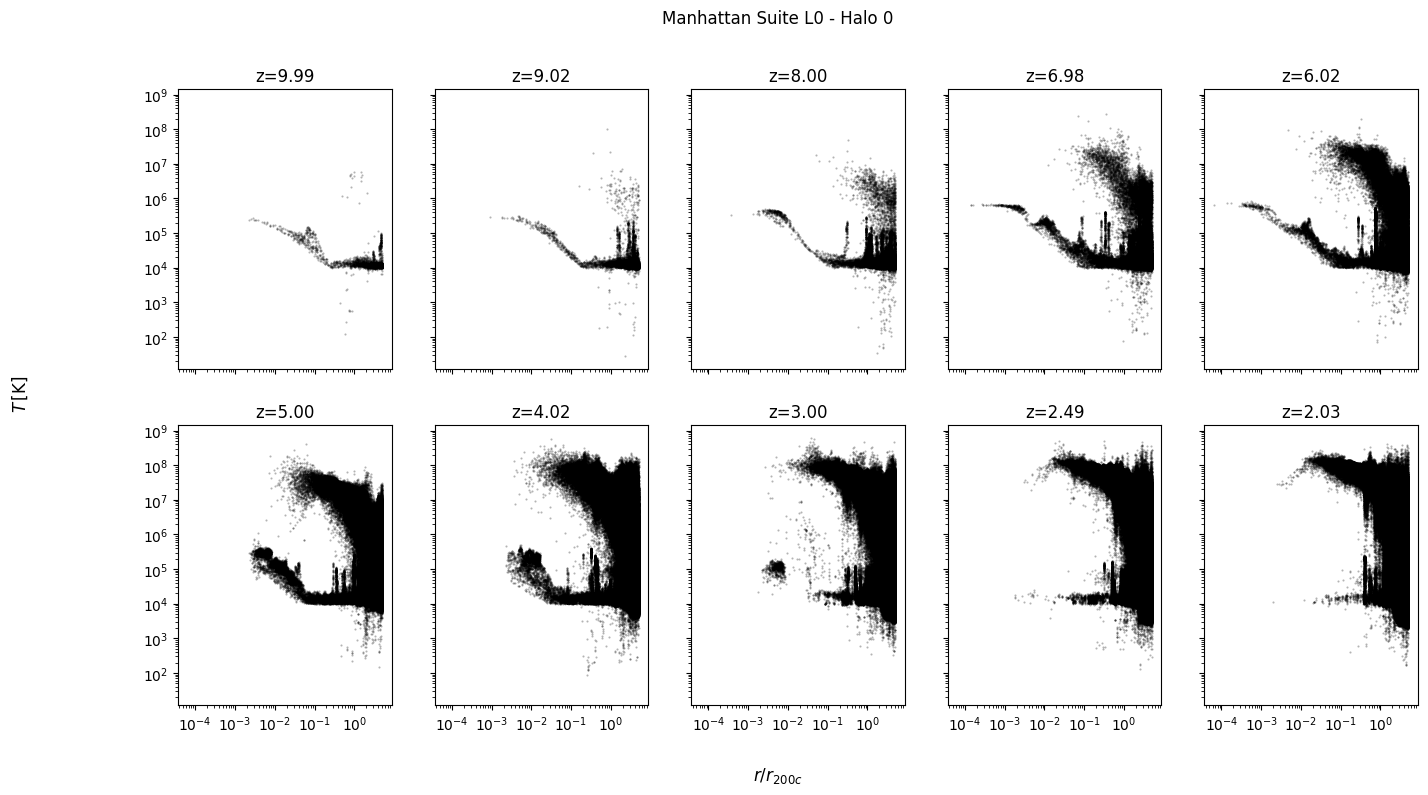

In [14]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0')
fig.supxlabel(r'$r/r_{200c}$')
fig.supylabel(r'$T\,[\mathrm{K}]$')

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = items['particle_props']['gas_radii_r200c'].in_units('')
    y = items['particle_props']['gas_temp'].in_units('K')

    full_filter = items['particle_filters']['halo_gas_filter'] & items['particle_filters']['gas_wind_filter']
    
    
    axis.plot(x[full_filter], y[full_filter], color='black', marker='o', ms=0.5, alpha=0.3, ls='')
    axis.set_xscale('log')
    axis.set_yscale('log')
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')

091
104
119
136
154
176
201
233
252
272


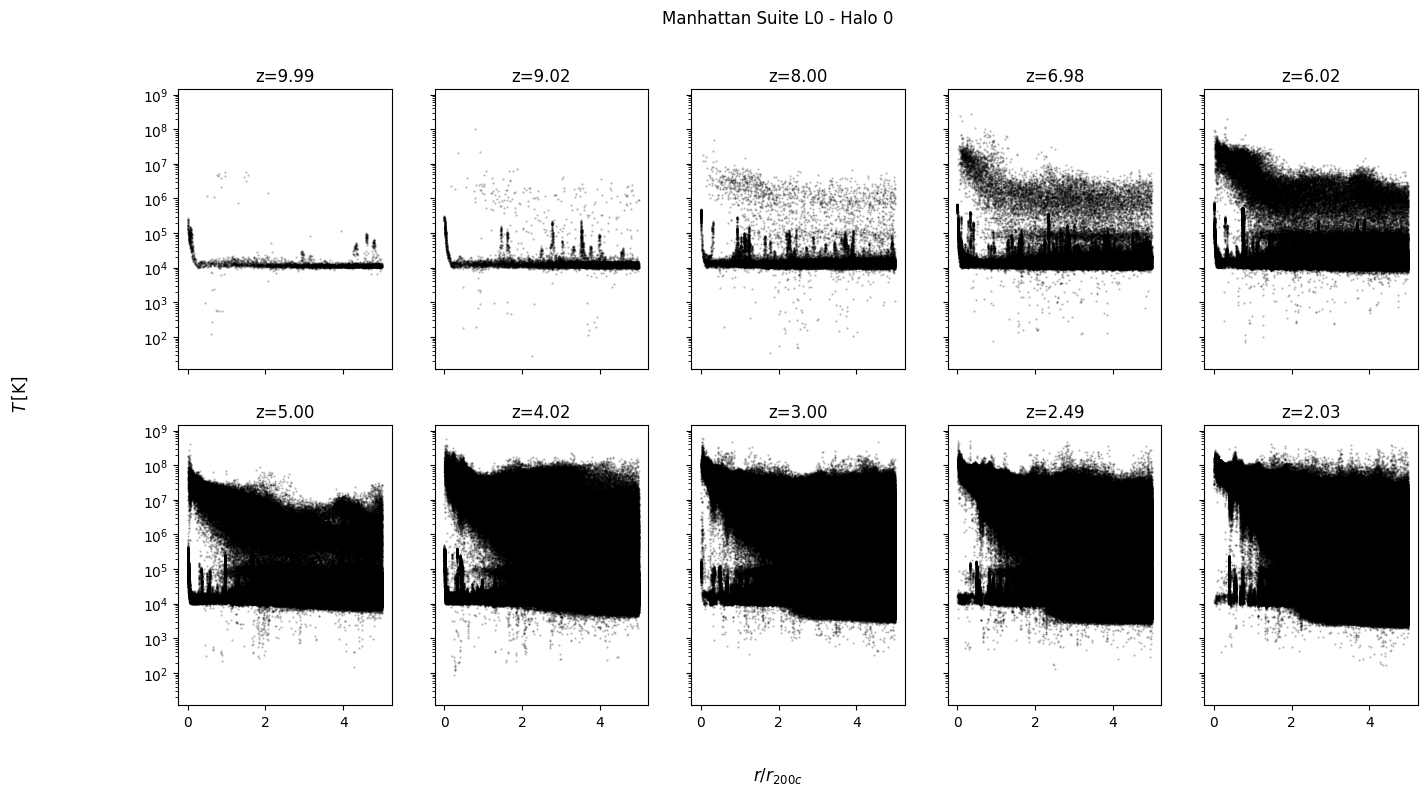

In [15]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0')
fig.supxlabel(r'$r/r_{200c}$')
fig.supylabel(r'$T\,[\mathrm{K}]$')

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = items['particle_props']['gas_radii_r200c'].in_units('')
    y = items['particle_props']['gas_temp'].in_units('K')

    full_filter = items['particle_filters']['halo_gas_filter'] & items['particle_filters']['gas_wind_filter']
    
    
    axis.plot(x[full_filter], y[full_filter], color='black', marker='o', ms=0.5, alpha=0.3, ls='')
    # axis.set_xscale('log')
    axis.set_yscale('log')
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')

091
104
119
136
154
176
201
233
252
272


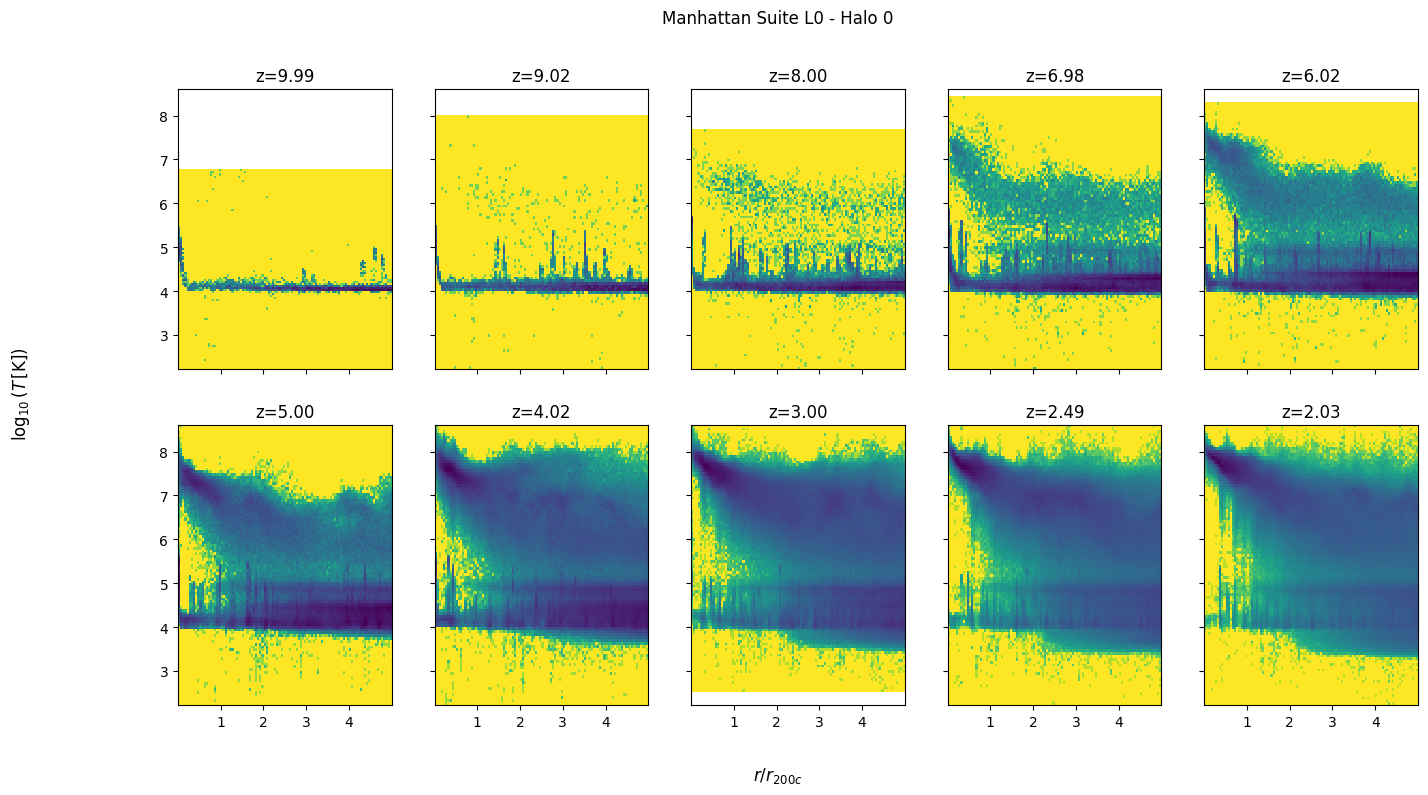

In [17]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0')
# fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supxlabel(r'$r/r_{200c}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$')

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = items['particle_props']['gas_radii_r200c'].in_units('')
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['halo_gas_filter'] & items['particle_filters']['gas_wind_filter']
    

    axis.hist2d(x[full_filter], y[full_filter], bins=100, cmap='viridis_r', norm='symlog')
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')

# fig.colorbar(mappable=mappable, ax=axes[:], label='z', ticks=z_ticks, format='{x:.2f}', pad=0.05, shrink=0.75)

## Temperature vs Radius

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



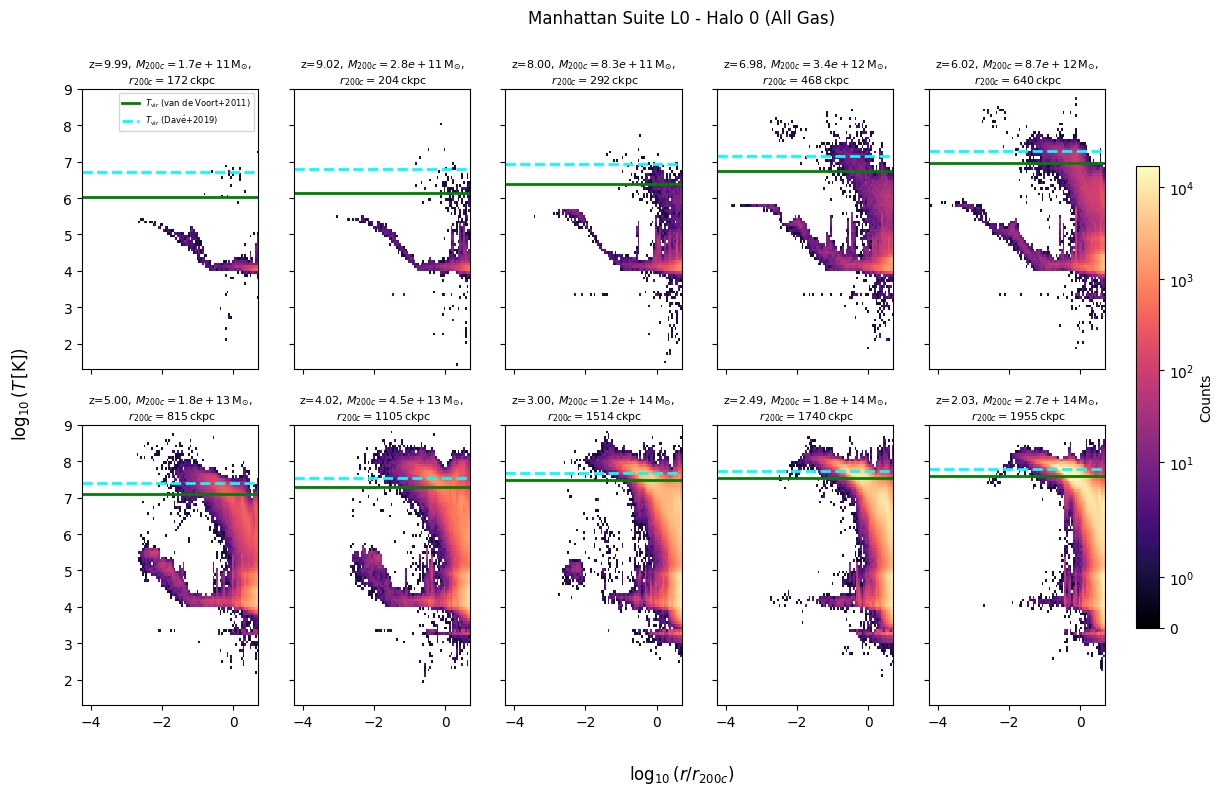

In [21]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (All Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=16960,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)


    ## Virial temperature lines
    axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=6)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



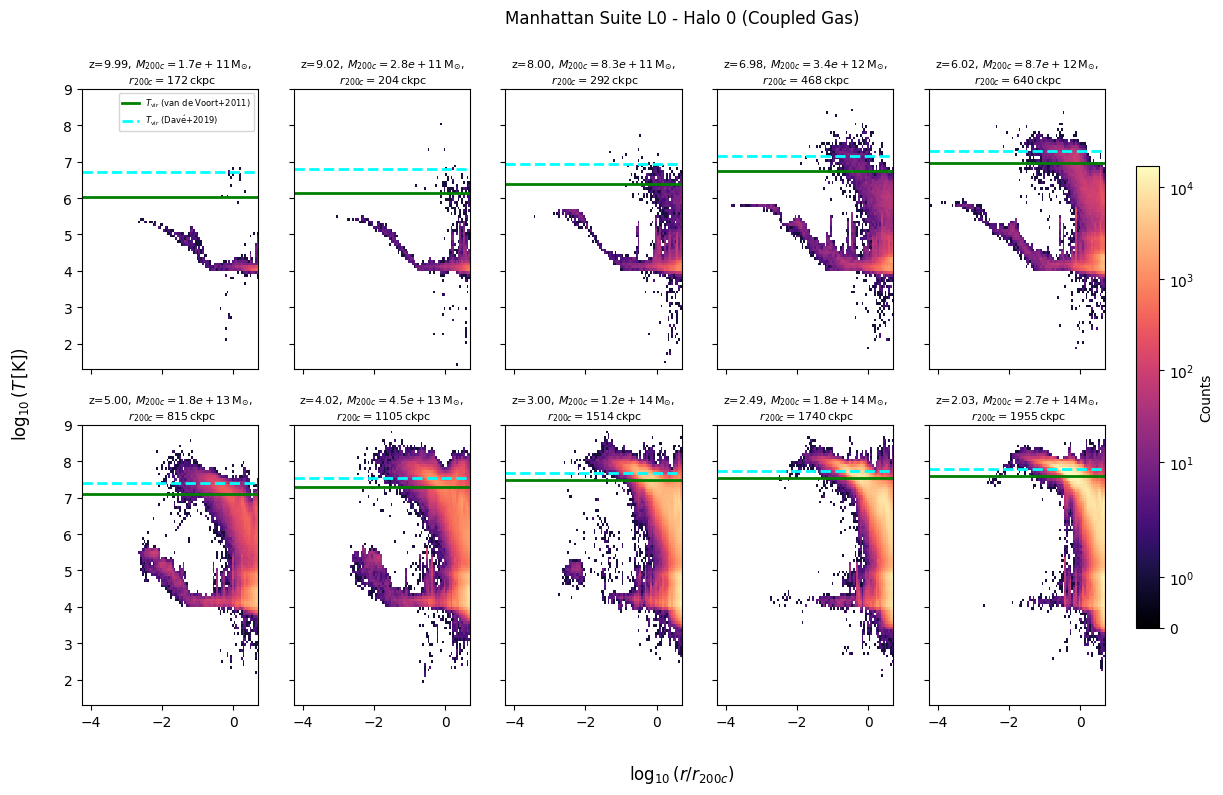

In [22]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Coupled Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['coupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=16960,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)


    ## Virial temperature lines
    axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=6)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



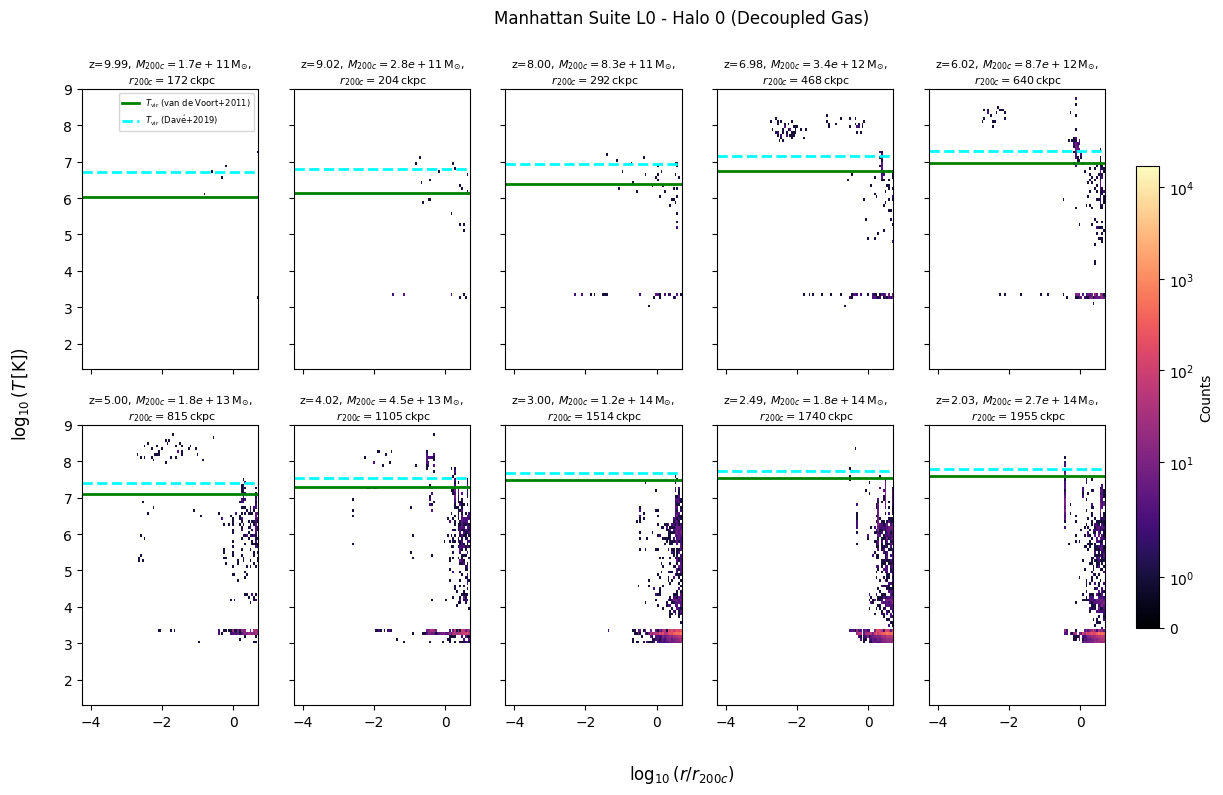

In [23]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Decoupled Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['decoupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=16960,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)


    ## Virial temperature lines
    axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=6)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



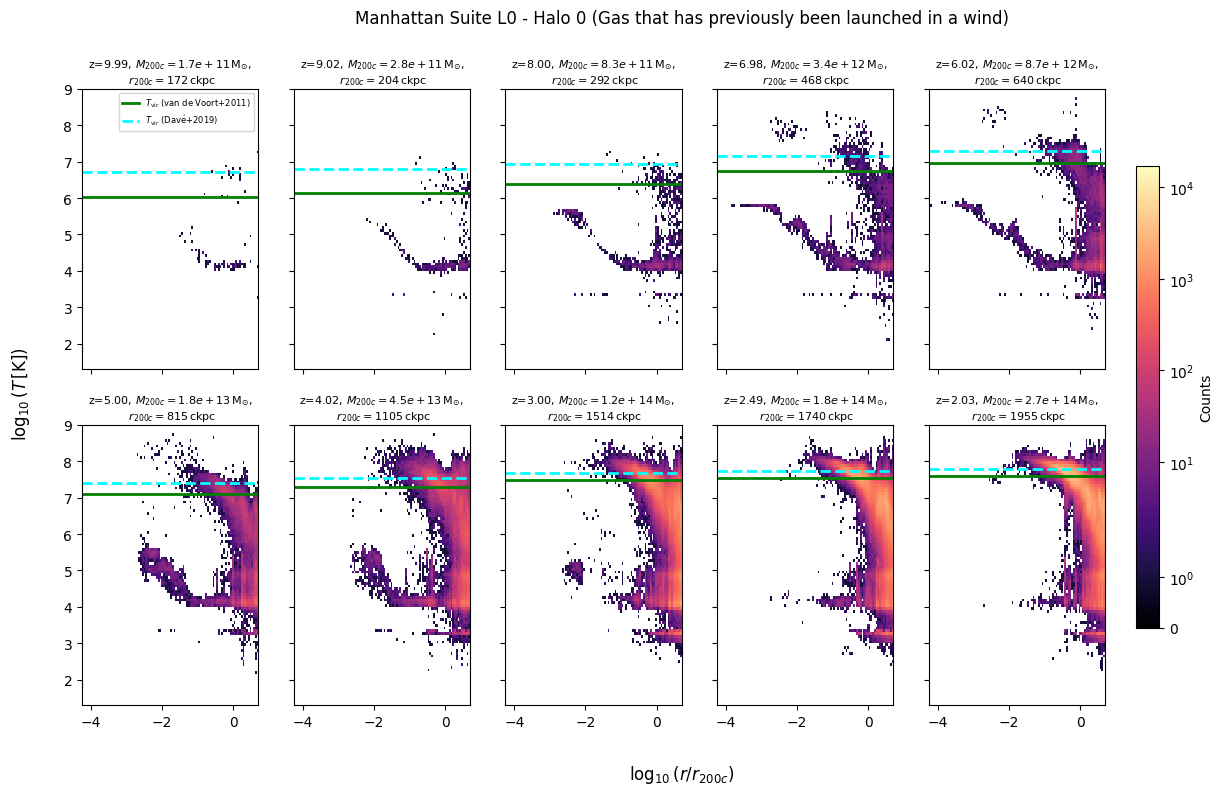

In [24]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has previously been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=16960,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)


    ## Virial temperature lines
    axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=6)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



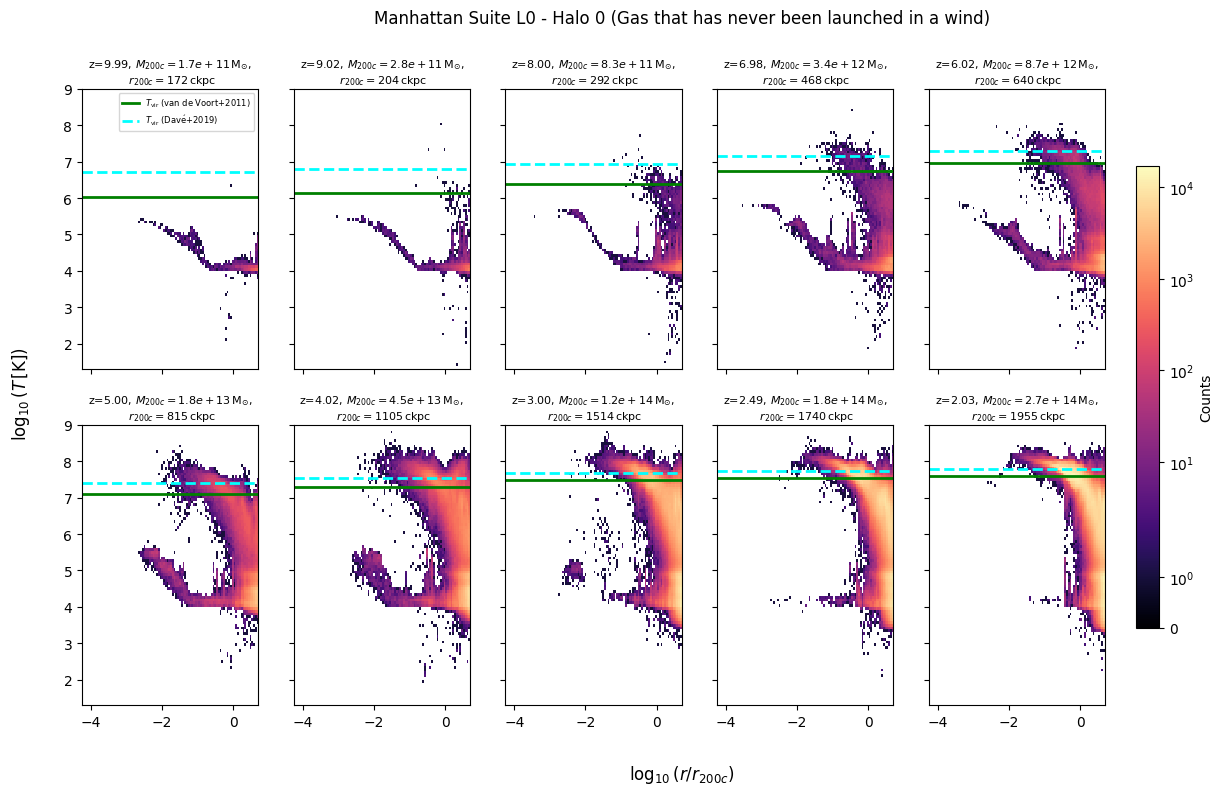

In [25]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has never been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['no_wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=16960,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)


    ## Virial temperature lines
    axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=6)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

### Old

## Density vs Radius

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



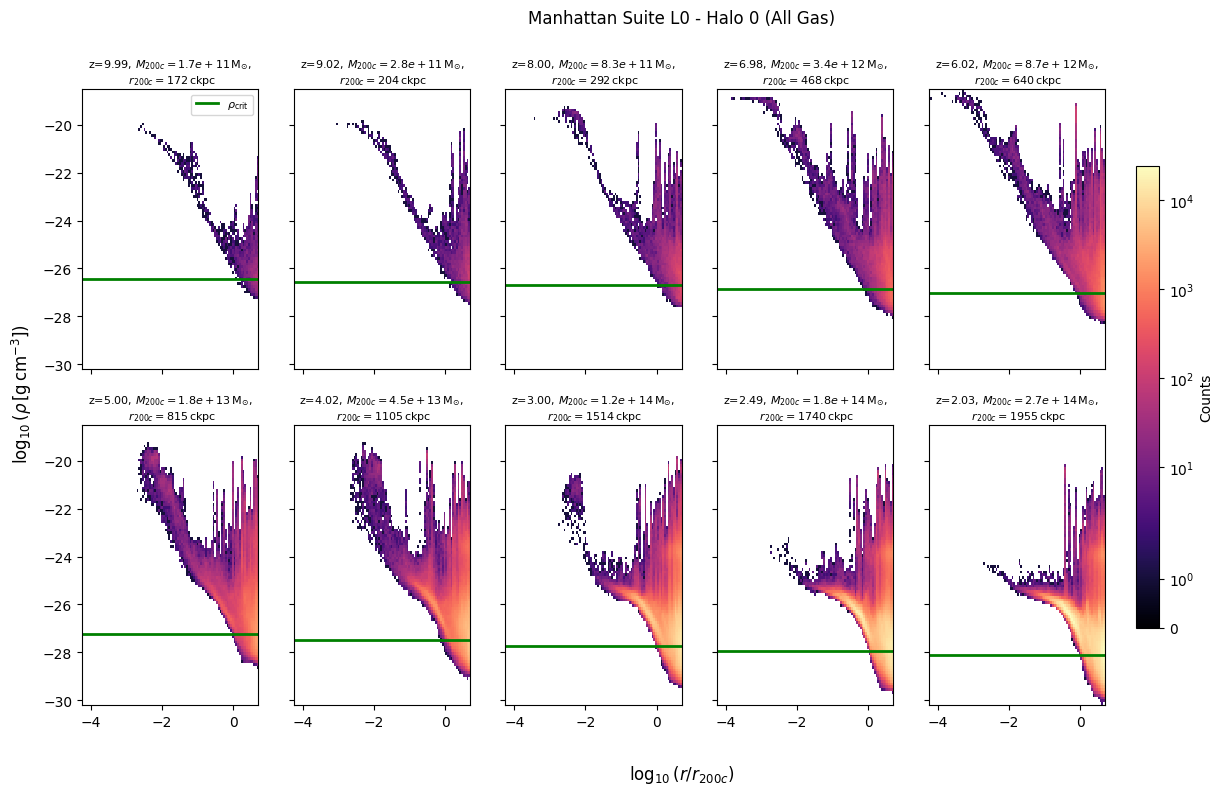

In [14]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (All Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(\rho\,[\mathrm{g\,cm^{-3}}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    rho_crit = items['snap_props']['rho_crit'].in_units('g/cm**3')
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    # Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    # Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_density'].in_units('g/cm**3'))

    full_filter = items['particle_filters']['all_halo_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[-30.2, -18.5]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=24179,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(-30.2, -18.5)


    ## Virial temperature lines
    # axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    # axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')

    ## Critical density line
    axis.axhline(y=np.log10(rho_crit), lw=2, ls='-', color='green', label=r'$\rho_{\mathrm{crit}}$')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=8)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



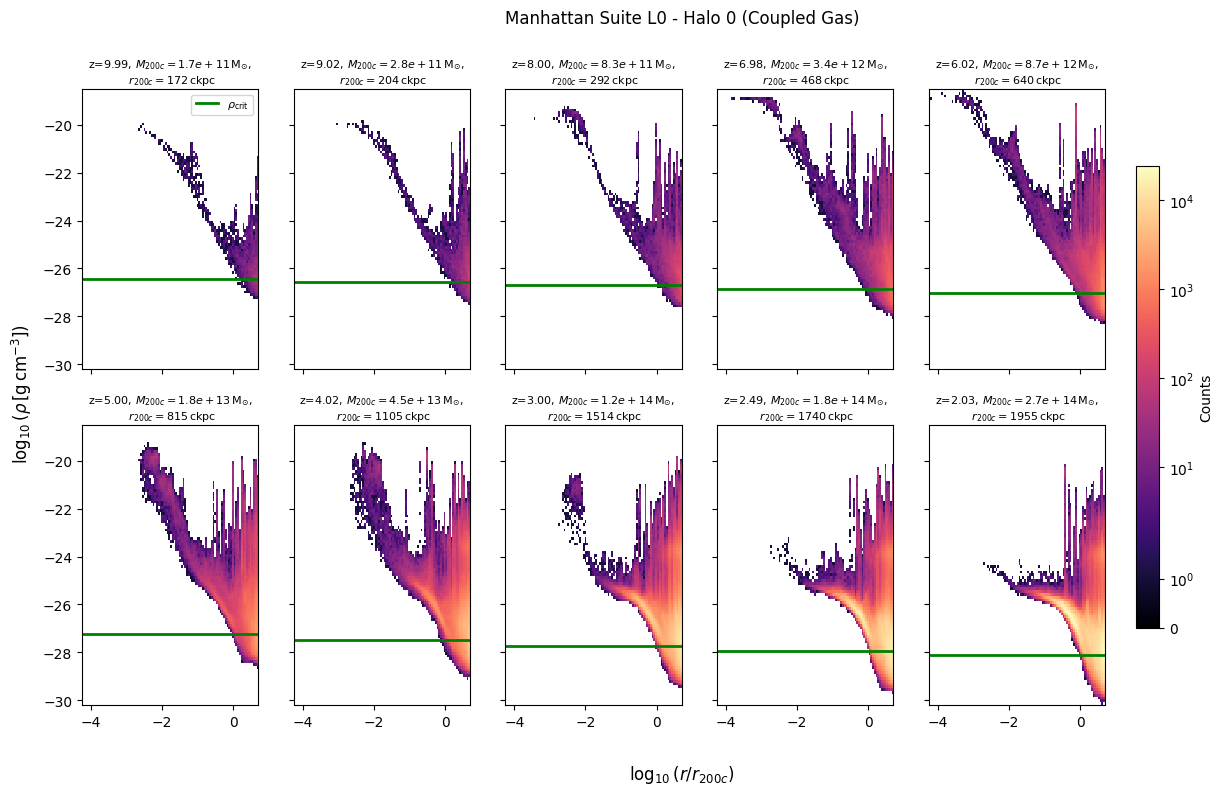

In [15]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Coupled Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(\rho\,[\mathrm{g\,cm^{-3}}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    rho_crit = items['snap_props']['rho_crit'].in_units('g/cm**3')
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    # Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    # Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_density'].in_units('g/cm**3'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['coupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[-30.2, -18.5]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=24179,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(-30.2, -18.5)


    ## Virial temperature lines
    # axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    # axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')

    ## Critical density line
    axis.axhline(y=np.log10(rho_crit), lw=2, ls='-', color='green', label=r'$\rho_{\mathrm{crit}}$')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=8)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



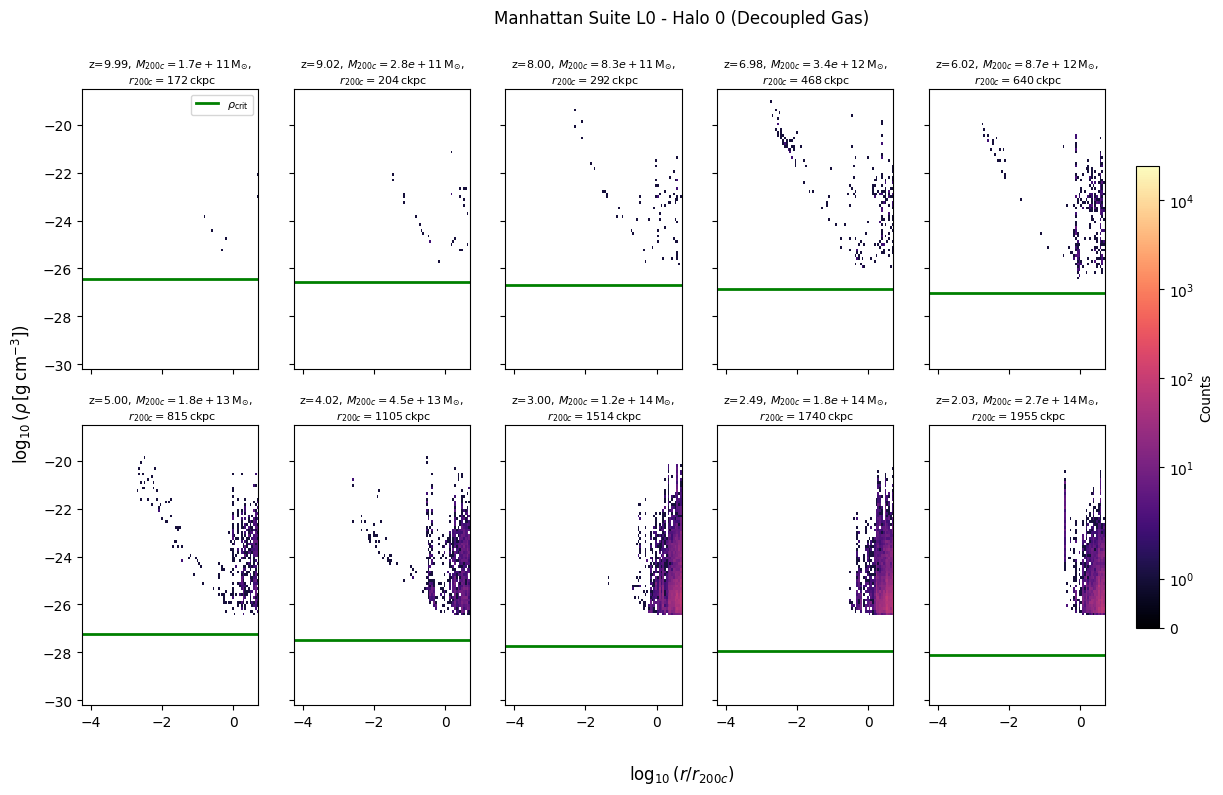

In [16]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Decoupled Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(\rho\,[\mathrm{g\,cm^{-3}}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    rho_crit = items['snap_props']['rho_crit'].in_units('g/cm**3')
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    # Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    # Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_density'].in_units('g/cm**3'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['decoupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[-30.2, -18.5]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=24179,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(-30.2, -18.5)


    ## Virial temperature lines
    # axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    # axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')

    ## Critical density line
    axis.axhline(y=np.log10(rho_crit), lw=2, ls='-', color='green', label=r'$\rho_{\mathrm{crit}}$')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=8)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



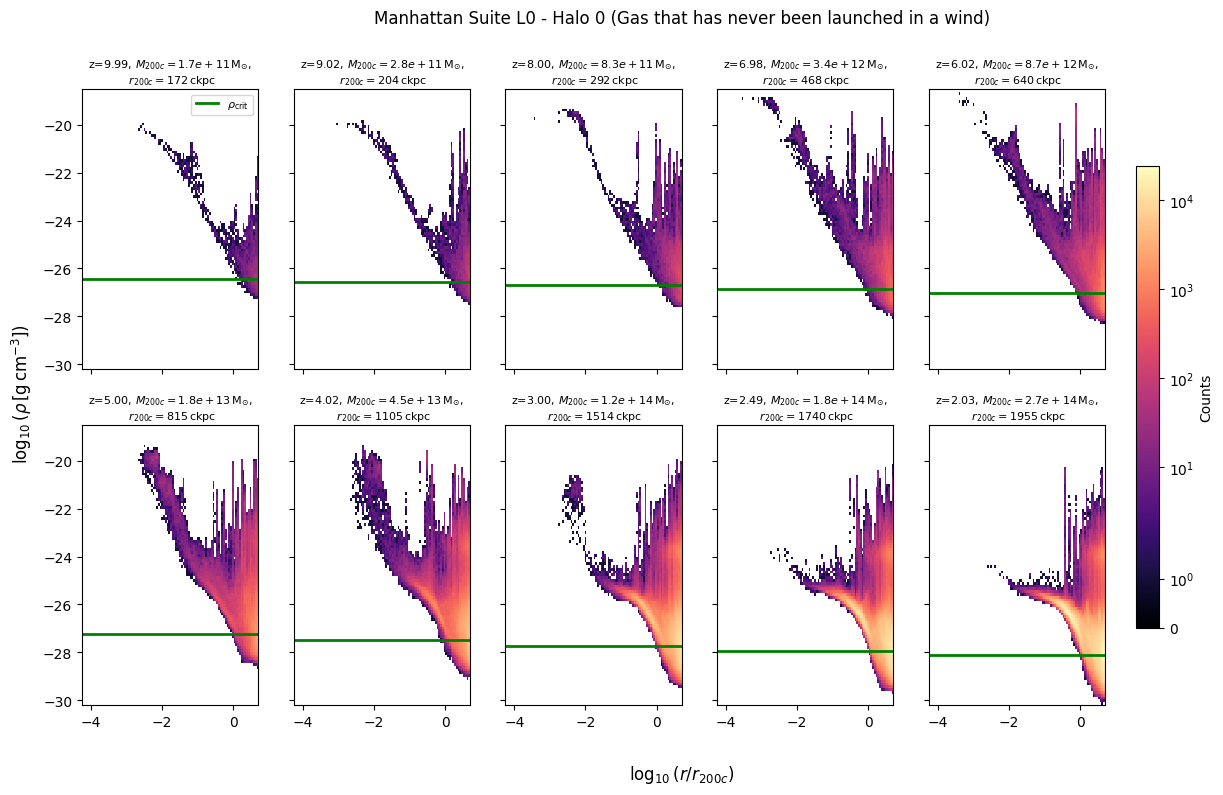

In [17]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has never been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(\rho\,[\mathrm{g\,cm^{-3}}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    rho_crit = items['snap_props']['rho_crit'].in_units('g/cm**3')
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    # Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    # Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_density'].in_units('g/cm**3'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['no_wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[-30.2, -18.5]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=24179,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(-30.2, -18.5)


    ## Virial temperature lines
    # axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    # axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')

    ## Critical density line
    axis.axhline(y=np.log10(rho_crit), lw=2, ls='-', color='green', label=r'$\rho_{\mathrm{crit}}$')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=8)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

In [ ]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has previously been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(\rho\,[\mathrm{g\,cm^{-3}}])}$', x=0.08)

for i, (axis, (key, items)) in enumerate(zip(ax.flatten(), snap_info.items())):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    rho_crit = items['snap_props']['rho_crit'].in_units('g/cm**3')
    m200c = items['halo_props']['m200c'].in_units('Msun')
    r200c = items['halo_props']['r200c'].in_units('kpccm')
    # Tvir_vandeVoort2011 = items['halo_props']['Tvir_vandeVoort+2011'].in_units('K')
    # Tvir_dave2019 = items['halo_props']['Tvir_dave+2019'].in_units('K')

    # print(Tvir_vandeVoort2011)
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_density'].in_units('g/cm**3'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[-30.2, -18.5]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=24179,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(-30.2, -18.5)


    ## Virial temperature lines
    # axis.axhline(y=np.log10(Tvir_vandeVoort2011), lw=2, ls='-', color='green', label=r'$T_{\mathrm{vir}}$ (van de Voort+2011)')
    # axis.axhline(y=np.log10(Tvir_dave2019), lw=2, ls='--', color='cyan', label=r'$T_{\mathrm{vir}}$ (Dav$\mathrm{\'e}$+2019)')

    ## Critical density line
    axis.axhline(y=np.log10(rho_crit), lw=2, ls='-', color='green', label=r'$\rho_{\mathrm{crit}}$')
    
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f},' + r' $M_{200c} = %.1e \, \mathrm{M_{\odot}}$,' % m200c + '\n' + r' $r_{200c} = %.0f \, \mathrm{ckpc}$' % r200c,
                   fontsize=8, wrap=True)
    print()

    if i == 0: axis.legend(fontsize=8)

mappable = get_first_mappable(ax[-1,-1])
# fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', format='{x:.2f}', pad=0.05, shrink=0.75)
fig.colorbar(mappable=mappable, ax=ax[:], label='Counts', pad=0.025, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272


091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



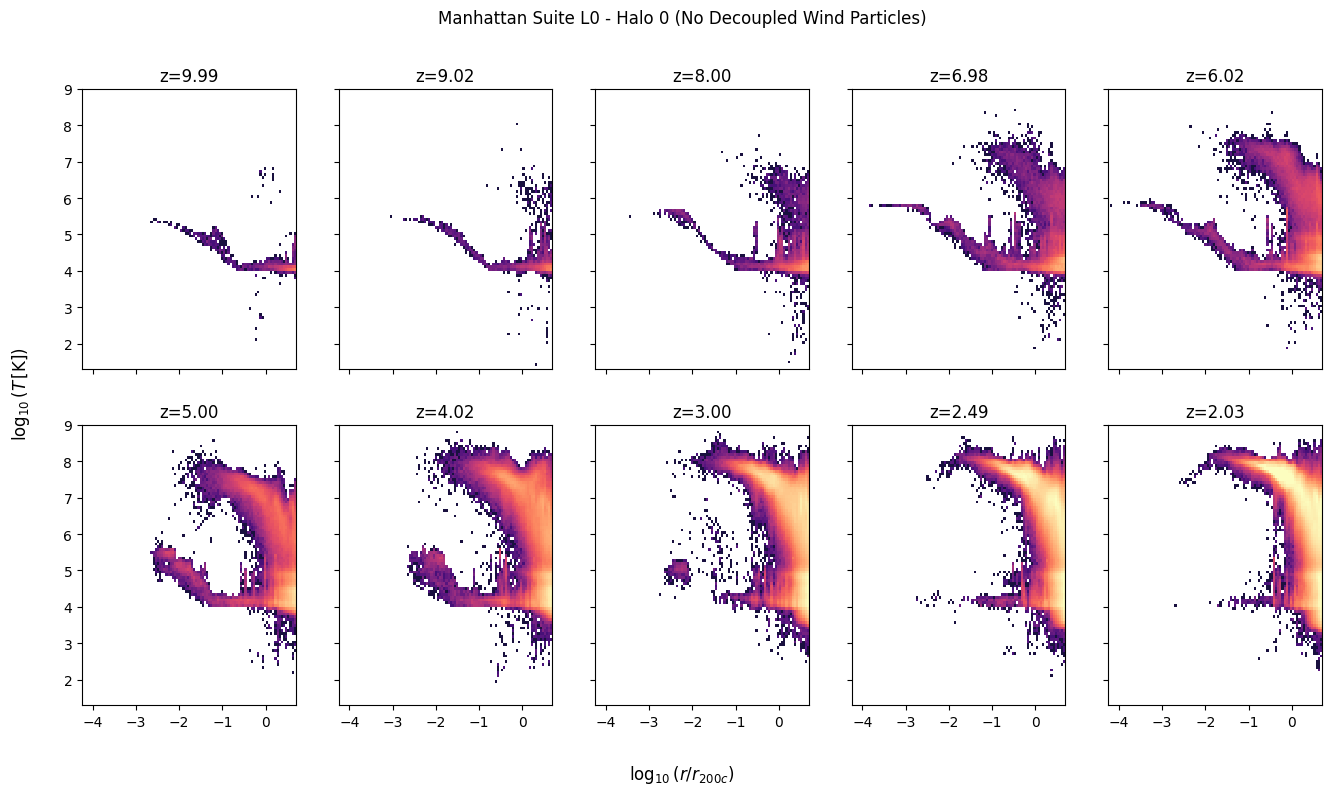

In [18]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (No Decoupled Wind Particles)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['coupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=10524,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')
    print()

# fig.colorbar(mappable=mappable, ax=axes[:], label='z', ticks=z_ticks, format='{x:.2f}', pad=0.05, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



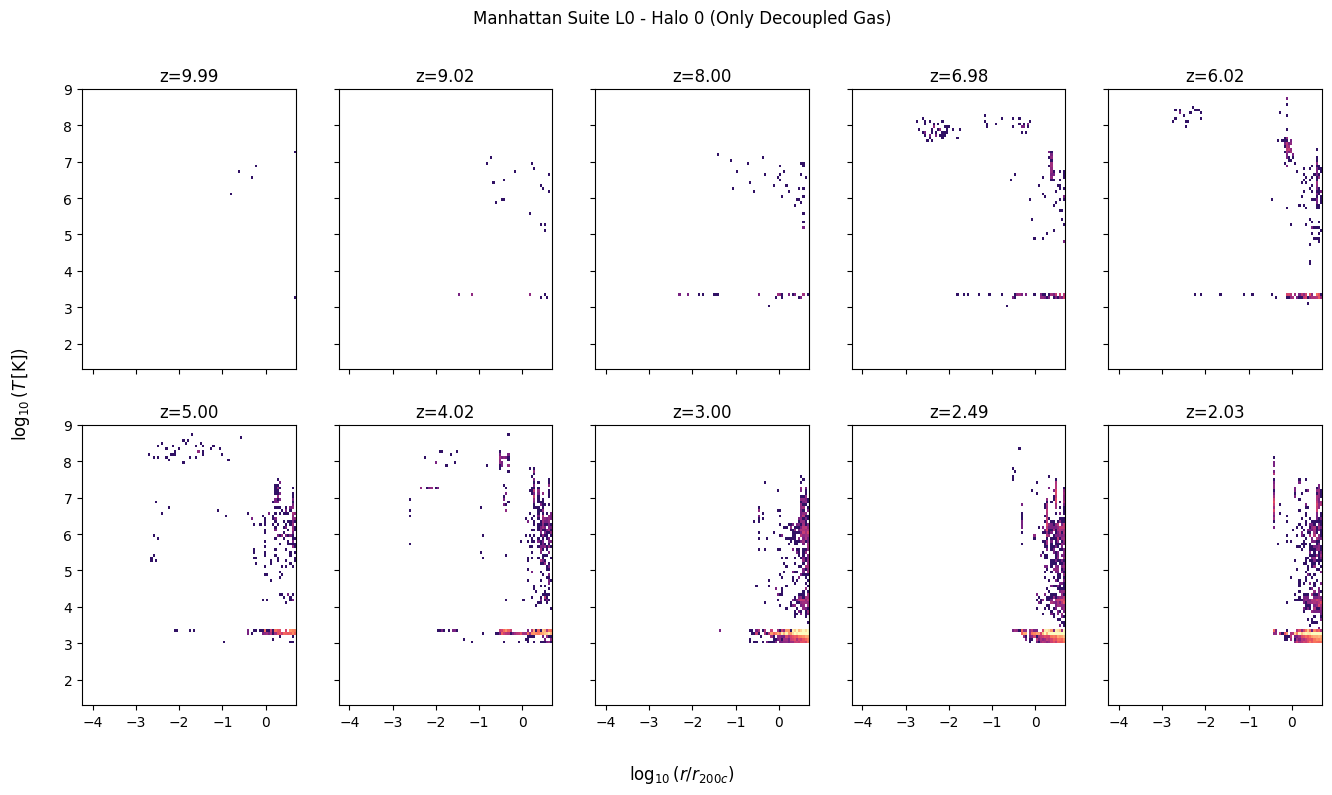

In [21]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Only Decoupled Gas)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['decoupled_gas']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=218,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')
    print()

# fig.colorbar(mappable=mappable, ax=axes[:], label='z', ticks=z_ticks, format='{x:.2f}', pad=0.05, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



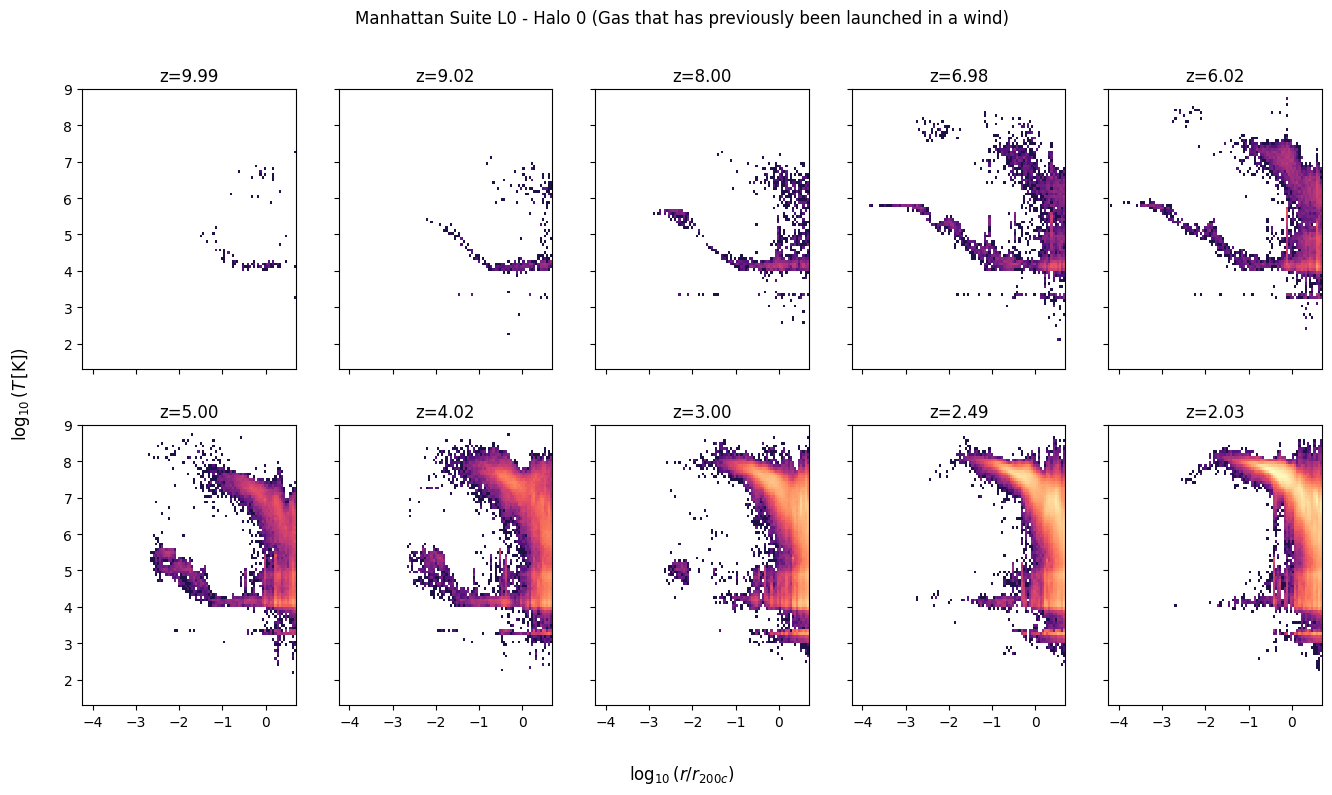

In [23]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has previously been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=3774,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')
    print()

# fig.colorbar(mappable=mappable, ax=axes[:], label='z', ticks=z_ticks, format='{x:.2f}', pad=0.05, shrink=0.75)

091
nan

104
nan

119
nan

136
nan

154
nan

176
nan

201
nan

233
nan

252
nan

272
nan



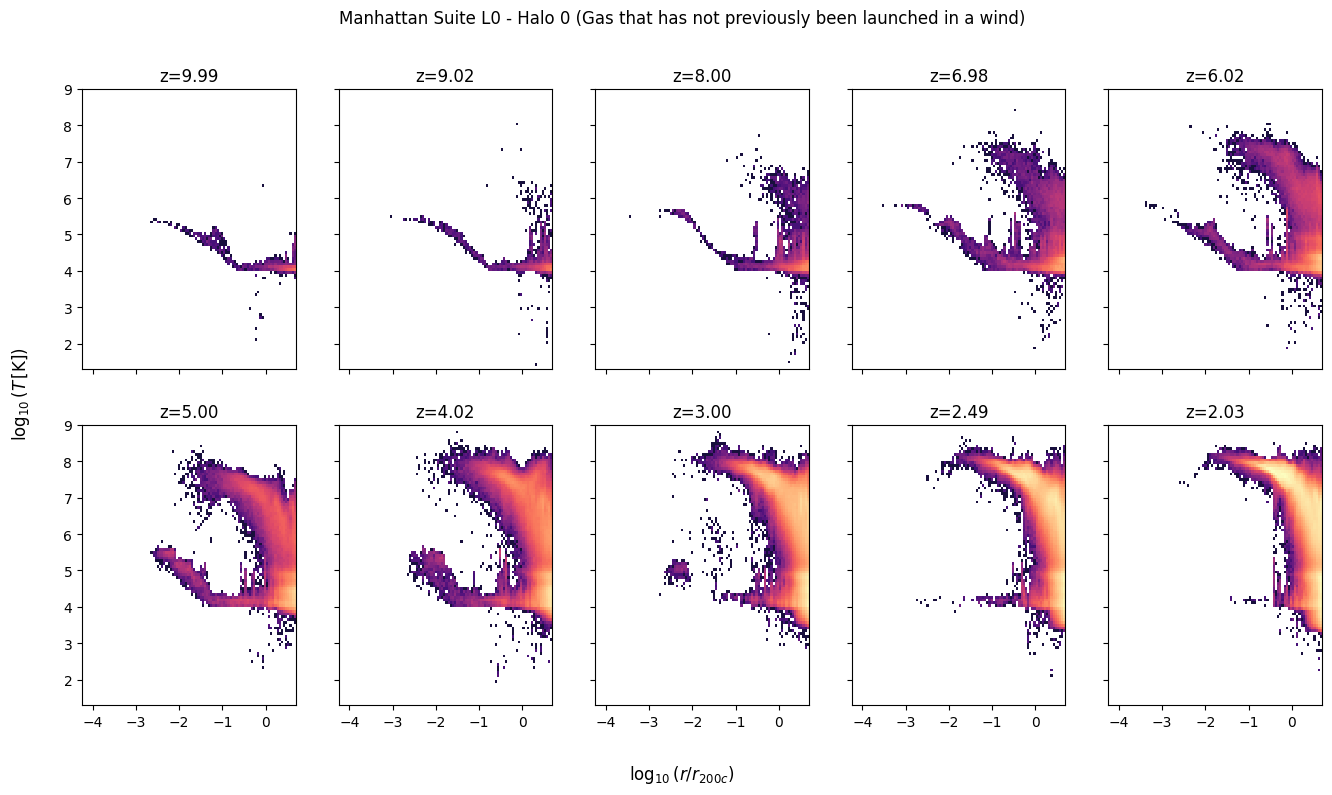

In [25]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), sharex='all', sharey='all')
fig.suptitle('Manhattan Suite L0 - Halo 0 (Gas that has not previously been launched in a wind)')
fig.supxlabel(r'$\log_{10}{(r/r_{200c})}$')
fig.supylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$', x=0.08)

for axis, (key, items) in zip(ax.flatten(), snap_info.items()):
    print(key)
    # print(items)
    
    z = items['snap_props']['z']
    
    x = np.log10(items['particle_props']['gas_radii_r200c'].in_units(''))
    y = np.log10(items['particle_props']['gas_temp'].in_units('K'))

    full_filter = items['particle_filters']['all_halo_gas'] & items['particle_filters']['no_wind_launches']
    

    h, xedges, yedges, image = axis.hist2d(x[full_filter], y[full_filter],
                bins=100, range=[[-4.25, np.log10(5)],[1.3, 9]],
                cmin=1,
                cmap='magma', norm='symlog', 
                vmin=0, vmax=13687,
               )
    print(np.max(h))
    # axis.colorbar()
    # axis.set_xscale('log')
    # axis.set_yscale('log')
    axis.set_xlim(-4.25, np.log10(5))
    axis.set_ylim(1.3, 9)
    # axis.set_xlabel(r'$r/r_{200c}$')
    # axis.set_ylabel(r'$T\,[\mathrm{K}]$')
    axis.set_title(f'z={z:.2f}')
    print()

# fig.colorbar(mappable=mappable, ax=axes[:], label='z', ticks=z_ticks, format='{x:.2f}', pad=0.05, shrink=0.75)

In [ ]:
## Look at how BH mass or number of jets in halo/central galaxy evolve over redshift to see if it coincides with anything above
## Do similar thing with star formation rate of halo/central galaxy